In [ ]:
"""
Purpose: To Inspect the Neurons that were really bad

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-24 17:34:07,544 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 17:34:07,546 - settings - Setting database.user to celiib
INFO - 2021-04-24 17:34:07,547 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 17:34:07,552 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-24 17:34:07,553 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 17:34:07,567 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-24 17:34:08,008 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 17:34:08,012 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 17:34:08,013 - settings - Setting database.user to celiib
INFO - 2021-04-24 17:34:08,014 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 17:34:08,015 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 17:34:08,016 - settings - Setting database.user to celiib
INFO - 2021-04-24 17:34:08,016 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 17:34:08,019 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 17:34:08,477 - settings - Setting enable_python_native_blobs to True


In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-24 17:34:08,601 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 17:34:08,602 - settings - Setting database.user to celiib
INFO - 2021-04-24 17:34:08,603 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 17:34:08,607 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 17:34:09,104 - settings - Setting enable_python_native_blobs to True


In [4]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Downloading the Neuron

In [42]:
seg_id = 864691135740225387
seg_id = 864691136333790899
seg_id = 864691135771629819

Decompressing Neuron in minimal output mode...please wait

--- Working on filter 0:
function = axon_on_dendrite_merges
function __name__ = filter_away_axon_on_dendrite_merges
function arguments = {'use_pre_existing_axon_labels': True}




Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh



--- Working on filter 1:
function = high_degree_branching
function __name__ = filter_away_high_degree_branching
function arguments = {'offset': 1500, 'comparison_distance': 2000, 'worst_case_match_threshold': 65, 'width_diff_max': 60, 'match_threshold': 45, 'angle_buffer': 15, 'max_degree_to_resolve': 6, 'match_method': 'best_match'}




 ----- Working on coordinate [739362.2379257  755282.28049686 837120.94842382]--------
coordinate [739362.2379257  755282.28049686 837120.94842382] had error branches [21 13]--------


 ----- Working on coordinate [757592.2 833732.6 895872.9]--------
coordinate [757592.2 833732.6 895872.9] had error branches [54 55]--------


 ----- Working on coordinate [787292.53025783 828441.87746682 905316.83792025]--------
coordinate [787292.53025783 828441.87746682 905316.83792025] had error branches [93 95]--------


 ----- Working on coordinate [799756.10234805 782527.18766394 914202.55136582]--------
coordinate [799756.10234805 782527.18766394 914202.55136582


--- Working on filter 2:
function = axon_webbing_t_merges
function __name__ = filter_away_webbing_t_merges
function arguments = {'child_width_maximum': 75, 'parent_width_maximum': 75, 'axon_only': True, 'error_if_web_is_none': True, 'web_size_threshold': 120, 'web_size_type': 'ray_trace_median', 'web_above_threshold': True}


limb_branch_dict_to_cancel = {}

--- Working on filter 3:
function = double_back_and_width_change
function __name__ = filter_away_large_double_back_or_width_changes
function arguments = {'perform_double_back_errors': True, 'skip_double_back_errors_for_axon': False, 'width_jump_threshold': 250, 'running_width_jump_method': True, 'double_back_axon_like_threshold': 145, 'double_back_threshold': 120, 'allow_axon_double_back_angle_with_top': 39, 'allow_axon_double_back_angle_with_top_width_min': 140, 'skeletal_length_to_skip': 4000, 'comparison_distance': 3000, 'perform_width_errors': True, 'perform_axon_width_errors': False}


limb_branch_dict_to_cancel = {}

--- Wor

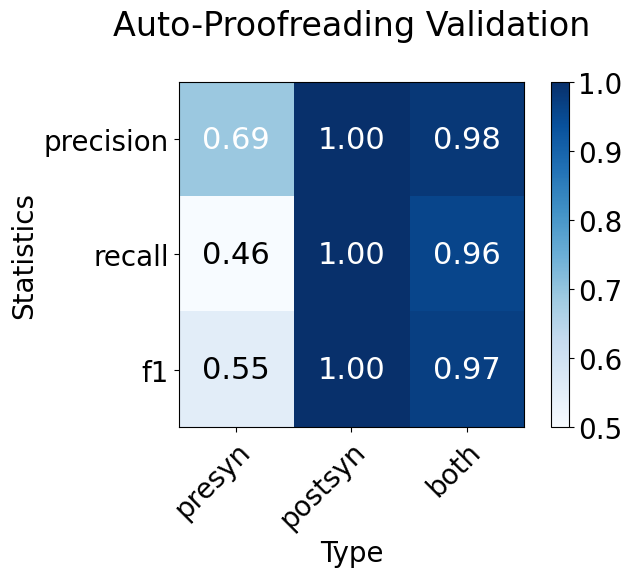

In [43]:
#1) Dwonload the neuron object
neuron_obj = du.fetch_neuron_obj_manual(seg_id,
                                   border_validation=True)

(filt_neuron,
 return_synapse_df_revised,
return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                    filter_list = pru.v4_exc_filters(),
                    plot_limb_branch_filter_with_disconnect_effect = True,
                    verbose = True,
                    plot_score=False)

vu.synapse_validation_df_to_score_plot(return_validation_df_revised)

In [44]:
vu.plot_validation_synapses(seg_id,
                            validation_df = return_validation_df_revised,
                             synapse_dict = None,
                             synapses_type_to_plot = None,
                             synapses_type_to_not_plot = None,
                             verbose=False,
                             synapse_type = "presyn",
                             TP_color="yellow",
                            TN_color="aqua",
                            FP_color="black",
                            FN_color="orange",
                             synapse_scatter_size = 0.15,
                             
                             #for plotting the actual mesh parts to go along
                             
                             neuron_obj = filt_neuron,
                             plot_only_axon_skeleton = True,
                             error_mesh_color = "red",
                             valid_mesh_color = "green",
                             valid_skeleton_color = "black",
                             mesh_alpha = 0.3,)

Using the mesh from the neuron object


TP:yellow
TN:aqua
FP:black
FN:orange


In [ ]:
nviz.visualize_neuron(mesh_color_alpha=)

limb_name = L1

 Working on visualization type: mesh

 Working on visualization type: skeleton


No limb name was given so using L1 because was the limb in the first key


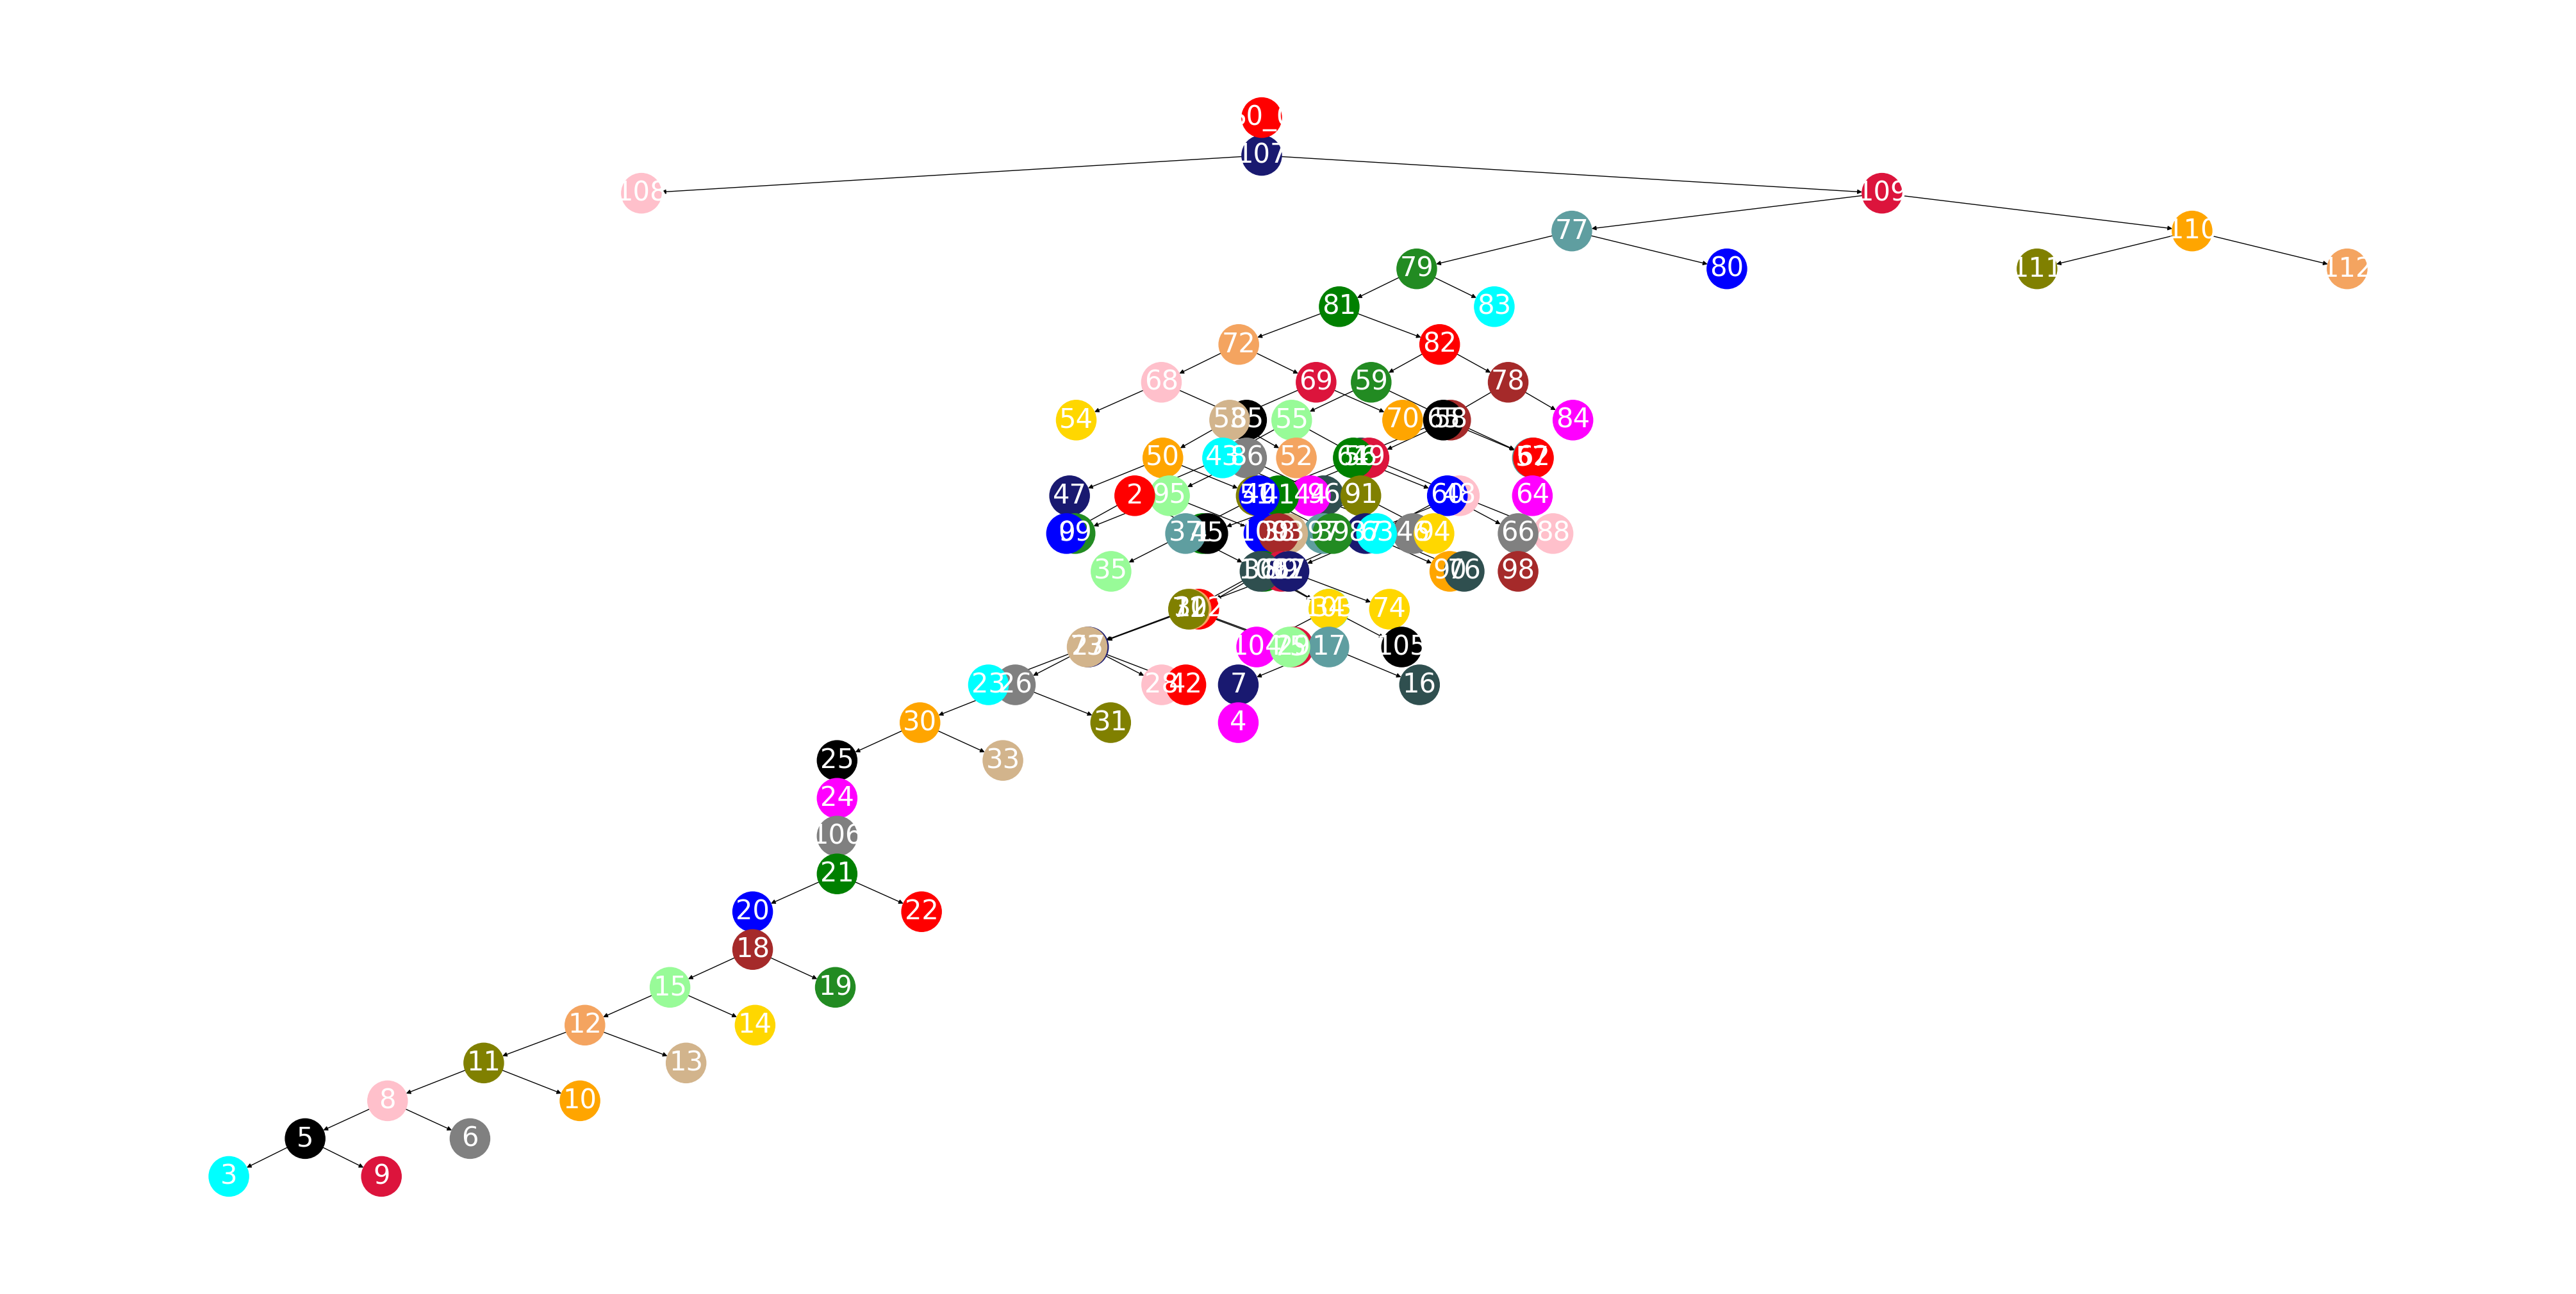

In [10]:
nviz.visualize_neuron_specific_limb(filt_neuron,
                     "axon")

In [13]:
exc_double_back_and_width_change_filter = pru.make_filter_dict("double_back_and_width_change",
                                                     pru.filter_away_large_double_back_or_width_changes,
                                                      dict(perform_double_back_errors=True,
                                                          skip_double_back_errors_for_axon=False,
                                                          #double_back_threshold = 140,

                                                           width_jump_threshold = 250,
                                                           running_width_jump_method=True, 


                                                           double_back_axon_like_threshold=145,
                                                           #double_back_threshold = 115,
                                                           double_back_threshold = 120,

                                                           allow_axon_double_back_angle_with_top = -1,
                                                           skeletal_length_to_skip = 4000,
                                                           comparison_distance = 3000,


                                                            perform_width_errors = True,
                                                           perform_axon_width_errors = False

                                                          ),
                                                               catch_error=True,
                                                     )


--- Working on filter 0:
function = double_back_and_width_change
function __name__ = filter_away_large_double_back_or_width_changes
function arguments = {'perform_double_back_errors': True, 'skip_double_back_errors_for_axon': False, 'width_jump_threshold': 250, 'running_width_jump_method': True, 'double_back_axon_like_threshold': 145, 'double_back_threshold': 120, 'allow_axon_double_back_angle_with_top': 39, 'allow_axon_double_back_angle_with_top_width_min': 109, 'skeletal_length_to_skip': 4000, 'comparison_distance': 3000, 'perform_width_errors': True, 'perform_axon_width_errors': False}


limb_branch_dict_to_cancel = {'L1': [3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 106]}


Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh





 ---- Total time for applying filter: 61.95905113220215 -----

--- Finished Part 1: Filtering Neuron -----
Apply the presyn non_error
For presyn: # valid synapses = 75, # error synapses  = 140, # error presyns = 23
For postsyn: # valid synapses = 3789, # error synapses  = 68, # error presyns = 0

--- Finished Part 2: Filtering Synapses -----
Synapsse Results:
Total Number of Synapses = 4072
n_valid_syn_ids_presyn = 75
n_errored_syn_ids_presyn = 140
n_valid_syn_ids_postsyn = 3789
n_errored_syn_ids_postsyn = 68

--- Finished Part 3: Generating Validation Dataframe -----
Segment Id = 864691136333790899
Postsyn counts:
TP:3788
TN:0
FP:1
FN:68
Presyn counts:
TP:72
TN:91
FP:25
FN:4


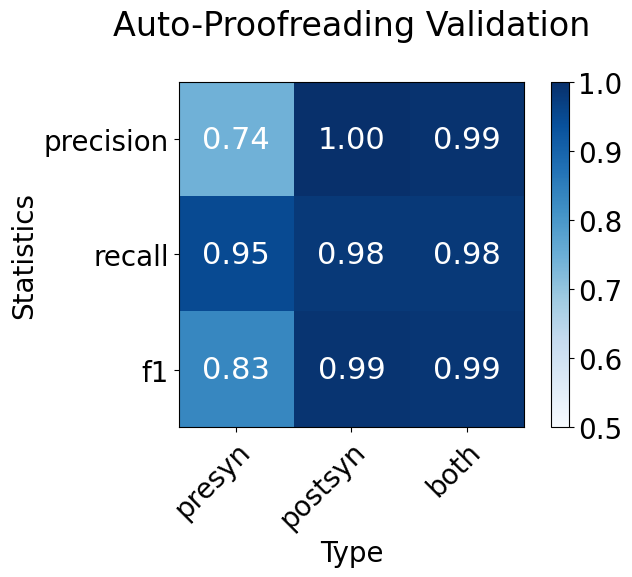

In [40]:
(filt_neuron_2,
 return_synapse_df_revised_2,
return_validation_df_revised_2) =  vu.filtered_neuron_score(neuron_obj = filt_neuron,   
                    filter_list = pru.v4_exc_filters(),
                    plot_limb_branch_filter_with_disconnect_effect = True,
                    verbose = True,
                    plot_score=False)

vu.synapse_validation_df_to_score_plot(return_validation_df_revised)

In [29]:
import networkx_utils as xu
xu.upstream_node(filt_neuron[filt_neuron.axon_limb_name].concept_network_directional,32)

36

In [37]:
import axon_utils as au
au.axon_width(filt_neuron[1][78])

173.06570652042635

limb_name = L1

 Working on visualization type: mesh

 Working on visualization type: skeleton


No limb name was given so using L1 because was the limb in the first key


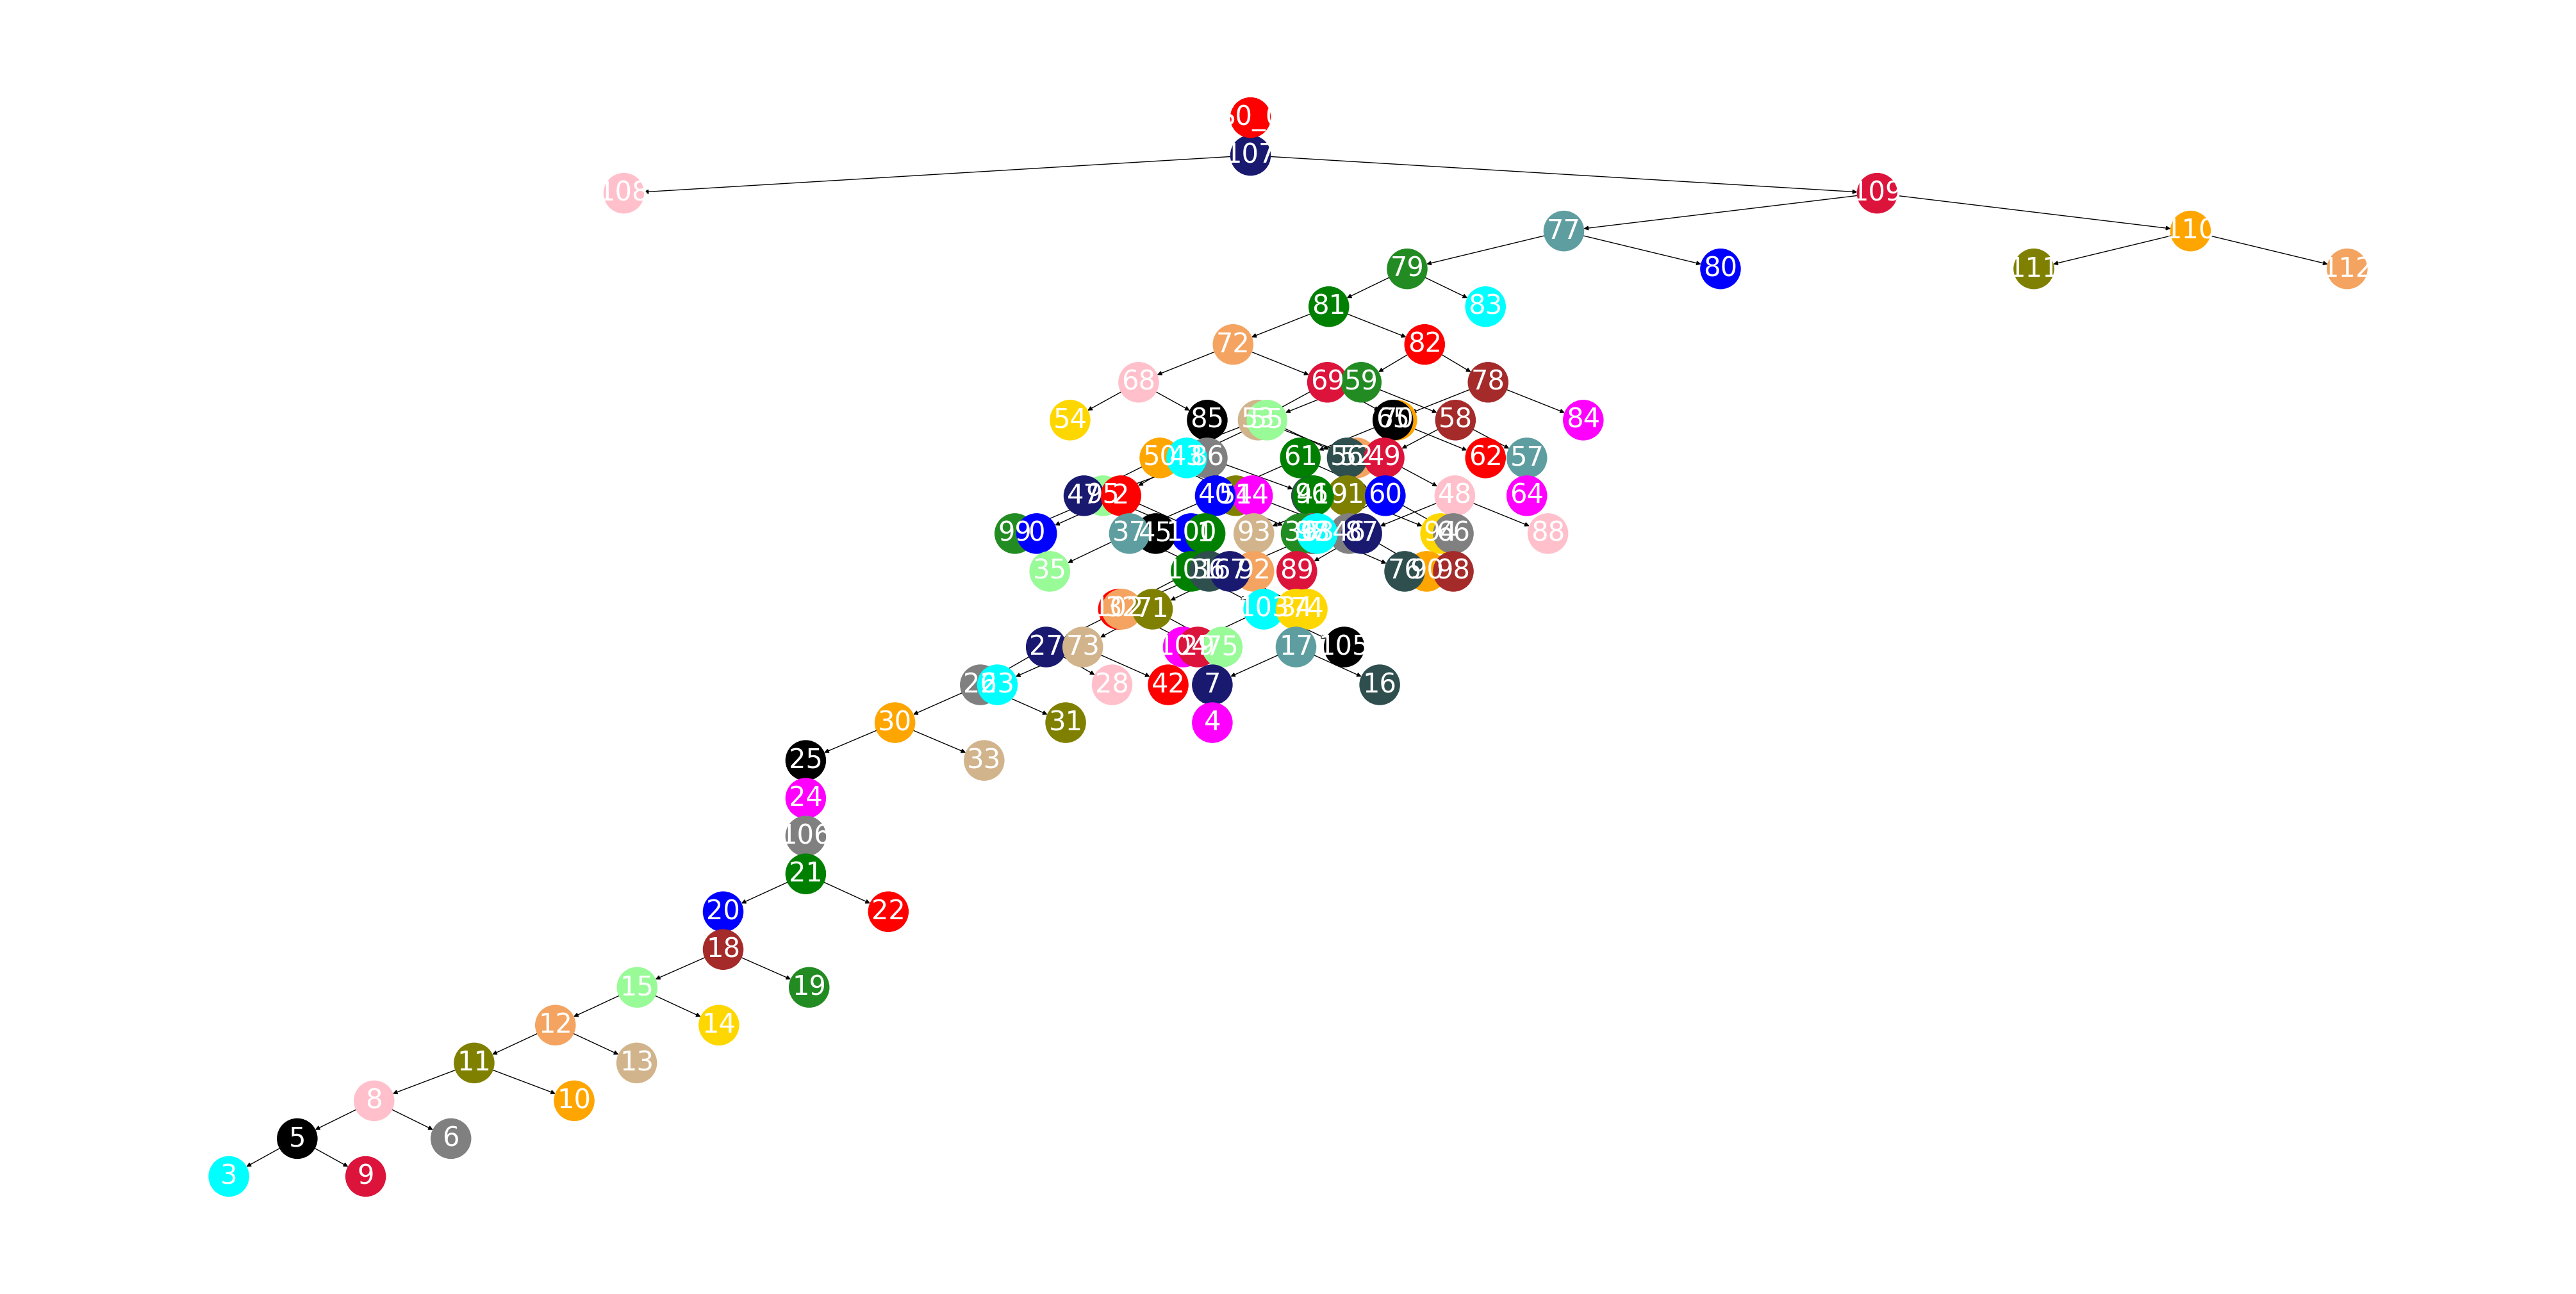

In [32]:
nviz.visualize_neuron_specific_limb(filt_neuron,
                                   "axon")

In [30]:
nviz.plot_branch_on_whole_mesh(filt_neuron,1,36)


 Working on visualization type: mesh


# checking why fork divergence was so bad

In [ ]:
ed.axon_fork_divergence_errors_limb_branch_dict(neuron_obj,
                                               plot_fork_div_limb_branch=True)

In [ ]:
import neuron_searching as ns

divergence_threshold_mean = 160
width_threshold = 90
upstream_width_max = 90,
verbose = False
plot_two_downstream_thick_axon_limb_branch = True
plot_fork_div_limb_branch = True
                                                
"""
Purpose: Will create a limb branch dict of all the skinny forking errors
on an axon

Pseudocode: 
1) Find the axon limb of the neuron (if none then return emptty dictionary)
2) Restrict the neuron to only axon pieces, with a width below certain threshold and having one sibling
3) Run the fork divergence function 
4) Return the limb branch dict highlight the errors where occured

"""


if neuron_obj.axon_limb_name is None:
    return {}

axon_brancehs = ns.query_neuron_by_labels(neuron_obj,
                                     matching_labels = ["axon"])

two_downstream_thick_axon_limb_branch = ns.query_neuron(neuron_obj,
               functions_list = ["n_siblings","axon_width","upstream_axon_width"],
               query = f"(n_siblings == 1) and (axon_width<{width_threshold})"
                       f" and (upstream_axon_width < {upstream_width_max})",
               return_dataframe=False,
                limb_branch_dict_restriction=axon_brancehs,
               limbs_to_process=[neuron_obj.axon_limb_name])
if verbose:
    print(f"two_downstream_thick_axon_limb_branch = {two_downstream_thick_axon_limb_branch}")
    
if plot_two_downstream_thick_axon_limb_branch:
    nviz.plot_limb_branch_dict(neuron_obj,
                          two_downstream_thick_axon_limb_branch)

fork_div_limb_branch = ns.query_neuron(neuron_obj,
           functions_list = ["fork_divergence"],
           query = f"fork_divergence < {divergence_threshold_mean}",
           return_dataframe=False,
            limb_branch_dict_restriction=two_downstream_thick_axon_limb_branch,
           limbs_to_process=[neuron_obj.axon_limb_name])

if verbose:
    print(f"With divergence_threshold_mean = {divergence_threshold_mean}\nfork_div_limb_branch = {fork_div_limb_branch}")
    
if plot_fork_div_limb_branch:
    nviz.plot_limb_branch_dict(neuron_obj,
                          fork_div_limb_branch)

In [ ]:
fork_div_limb_branch

In [ ]:
two_downstream_thick_axon_limb_branch = {'L0': np.array([  0,   4,   5,   6,   9,  10,  11,  12,  13,  14,  16,  17,  18,
        19,  24,  28,  29,  31,  32,  33,  36,  37,  42,  45,  46,  47,
        48,  49,  51,  52,  55,  56,  57,  58,  59,  67,  69,  72,  73,
        74,  77,  78,  79,  80,  82,  84,  88,  89,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 105, 106, 109, 112, 115, 117, 120,
       121, 122, 124, 125, 126, 128, 130, 132, 133, 134, 135, 136, 139,
       140, 143, 144, 145, 153, 154, 155, 156, 157, 159, 160, 161, 162,
       164, 165, 167, 168, 169, 170, 171, 172, 173, 174, 177, 178, 179,
       180, 182, 184, 186, 190, 192, 194, 196, 198, 199, 200, 203, 206,
       208, 209, 210, 211, 212, 214, 218, 222, 228, 229, 231, 233, 234,
       236, 241, 242, 243, 244, 245, 246, 247, 249, 250, 255, 256, 259,
       261, 262, 264, 267, 268, 269, 270, 272, 274, 275, 276, 277, 279,
       280, 282, 283, 289, 293, 294, 296, 304, 307, 313, 315, 329, 330,
       333, 338, 339, 340, 344, 347, 349, 350, 351, 352, 353, 354, 357,
       358, 363, 366, 367, 368])}



In [ ]:
import axon_utils as au
au.axon_width(neuron_obj[0][104])

In [ ]:
import neuron_statistics as nst
nst.upstream_axon_width(neuron_obj[0],106)

In [ ]:
nviz.visualize_neuron_specific_limb(neuron_obj,
                                   0)

# Inspecting why crossover did so poorly

In [ ]:
limb_obj = neuron_obj[neuron_obj.axon_limb_name]

In [ ]:
exactly_equal = False
crossover_coordinates = nru.high_degree_branching_coordinates_on_limb(limb_obj,min_degree_to_find=4,
                                                                         exactly_equal=exactly_equal,
                                                                         )
crossover_coordinates

In [ ]:
winning_downstream,error_downstream = ed.high_degree_upstream_match(limb_obj,
                          coordinate = crossover_coordinates[1],
                        plot_intermediates = True,
                        plot_match_intermediates = True,
                          verbose=True)
print(winning_downstream,error_downstream)

In [ ]:
from importlib import reload
ed = reload(ed)

In [ ]:
import error_detection as ed
err_dict = ed.high_degree_branch_errors_limb_branch_dict(neuron_obj,
                                                        verbose = True,
                                                        match_method="best_match")

In [ ]:
neuron_obj["L1"][186]

In [ ]:
nviz.visualize_neuron(neuron_obj,
                     limb_branch_dict=err_dict,
                     mesh_whole_neuron=True
                     )

In [ ]:
nviz.visualize_neuron_specific_limb(neuron_obj,1)

In [ ]:
import networkx_utils as xu
xu.downstream_nodes(neuron_obj[1].concept_network_directional,328)

In [ ]:
import numpy_utils as nu
ed.high_degree_upstream_match(
    limb_obj,
    coordinate = None,
    upstream_branch = 328,
    downstream_branches = np.array([330, 331, 333]),

    #arguments for the angle checking
    offset=1500,
    comparison_distance = 2000,
    worst_case_match_threshold = 65,
    plot_intermediates = True,
    plot_match_intermediates = True,

    #args for width matching
    width_diff_max = np.inf,#100,

    #args for definite pairs
    match_threshold = 45,
    angle_buffer = 15,
    
    max_degree_to_resolve = 6,
    axon_dependent = True,

    #args for picking the final winner
    match_method = "lowest_angle_sum", #other option is "best_match"
    verbose = True
    )

In [ ]:
import axon_utils as au
au.axon_width(neuron_obj[1][333])

In [ ]:
array([330, 331, 333])